In [3]:
from __future__ import division
import glob
import re
import os,sys
from astropy.io import fits
from astropy.io.fits import getheader, getdata
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy.stats import chisquare as cs

In [4]:
# Create a list of all of the fits file drectories
obj_list = glob.glob('/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT/*.FIT')

In [5]:
obj_list

['/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000015.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000016.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000017.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000018.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000019.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000020.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000021.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000022.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000023.BIAS.FIT',
 '/Users/hitom/Downloads/Academics/UC

In [6]:
# Separate the darks, biases, and light frames into different dictionaries
Dfits = {}
Dfits_open = {}
Bfits = {}
Bfits_open = {}
Fits = {}
Fits_open = {}
Dcount = 0
Bcount = 0
Count = 0
for n in range(len(obj_list)):
    if 'DARK' in obj_list[n]:
        Dfits[n-Dcount] = obj_list[n]
        Dfits_open[n-Dcount] = fits.open(obj_list[n])
        Bcount += 1
        Count += 1
    elif 'BIAS' in obj_list[n]:
        Bfits[n-Bcount] = obj_list[n]
        Bfits_open[n-Bcount] = fits.open(obj_list[n])
        Dcount += 1
        Count += 1
    else:
        Fits[n-Count] = obj_list[n]
        Fits_open[n-Count] = fits.open(obj_list[n])
        Dcount += 1
        Bcount += 1

In [7]:
Dfits

{0: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000060.DARK.FIT',
 1: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000061.DARK.FIT',
 2: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000062.DARK.FIT',
 3: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000063.DARK.FIT',
 4: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000064.DARK.FIT',
 5: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000065.DARK.FIT'}

In [8]:
Bfits

{0: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000015.BIAS.FIT',
 1: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000016.BIAS.FIT',
 2: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000017.BIAS.FIT',
 3: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000018.BIAS.FIT',
 4: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000019.BIAS.FIT',
 5: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000020.BIAS.FIT',
 6: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000021.BIAS.FIT',
 7: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000022.BIAS.FIT',
 8: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000023.BIAS.FIT',
 9: '/User

In [9]:
Fits

{0: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000035.FIT',
 1: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000036.FIT',
 2: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000037.FIT',
 3: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000038.FIT',
 4: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000039.FIT',
 5: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000040.FIT',
 6: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000041.FIT',
 7: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000042.FIT',
 8: '/Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\\TWILIGHT.00000043.FIT',
 9: '/Users/hitom/Downloads/Academics/UCSC Classes/Spri

In [10]:
Dfits_open[0].info()

Filename: /Users/hitom/Downloads/Academics/UCSC Classes/Spring 2019/ASTR136/TWILIGHT\TWILIGHT.00000060.DARK.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      46   (765, 510)   int16 (rescales to uint16)   


In [11]:
Bfits_open[0][0].data

array([[121, 122, 123, ..., 108, 115,  96],
       [122, 135, 120, ..., 113,  98, 118],
       [124, 134, 133, ..., 101, 107, 103],
       ...,
       [128, 118, 126, ..., 109, 107, 102],
       [125, 140, 127, ...,  96, 108,  99],
       [130, 128, 130, ..., 108, 102, 107]], dtype=uint16)

In [12]:
# Create an empty arrat to contain the master bias array
bshape = getdata(Bfits[0])
Master_b = np.empty(bshape.shape)
Master_b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# Add together all of the bias frames
for i in range(len(Bfits)):
    Master_b = Master_b + Bfits_open[i][0].data
Master_b

array([[2355., 2310., 2371., ..., 2027., 1954., 1981.],
       [2370., 2345., 2323., ..., 1941., 1975., 1930.],
       [2428., 2369., 2368., ..., 1987., 1977., 1987.],
       ...,
       [2364., 2338., 2345., ..., 1997., 1941., 1951.],
       [2340., 2368., 2386., ..., 1938., 1981., 1946.],
       [2372., 2314., 2365., ..., 1956., 1981., 1932.]])

In [14]:
# Average the sum of the bias frames
A_Master_b = Master_b/len(Bfits)

In [15]:
A_Master_b

array([[123.94736842, 121.57894737, 124.78947368, ..., 106.68421053,
        102.84210526, 104.26315789],
       [124.73684211, 123.42105263, 122.26315789, ..., 102.15789474,
        103.94736842, 101.57894737],
       [127.78947368, 124.68421053, 124.63157895, ..., 104.57894737,
        104.05263158, 104.57894737],
       ...,
       [124.42105263, 123.05263158, 123.42105263, ..., 105.10526316,
        102.15789474, 102.68421053],
       [123.15789474, 124.63157895, 125.57894737, ..., 102.        ,
        104.26315789, 102.42105263],
       [124.84210526, 121.78947368, 124.47368421, ..., 102.94736842,
        104.26315789, 101.68421053]])

In [16]:
Dfits_open[0][0].header

SIMPLE  =                    T/CCDSOFT-SOFTWARE BISQUE 3                        
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  765                                                  
NAXIS2  =                  510                                                  
BSCALE  = +1.000000000000E+000                                                  
BZERO   = +3.276800000000E+004                                                  
BIAS    =                  100                                                  
FOCALLEN= +2.000000000000E+003                                                  
APTAREA = +0.000000000000E+000                                                  
APTDIA  = +2.500000000000E+002                                                  
TELESCOP= 'Astro-Physics RC    '                                                
OBSERVER= 'George Brown     

In [17]:
Dfits_open[0][0].header[42]

25.0

In [18]:
# Note: This is the time at which the measurement was taken
Test_Time = Dfits_open[0][0].header[14]
Test_Hour = Test_Time[0:2]
Test_Minute = Test_Time[3:5]
Test_Second = Test_Time[6:12]
Test_Second

'49.236'

In [19]:
# Record the dark frame exposure times
Dexptimes = np.empty(len(Dfits))
for i in range(len(Dfits)):
    Dexptimes[i] = Dfits_open[i][0].header[42]

In [20]:
Dexptimes

array([25., 25., 30., 40., 60., 70.])

In [21]:
# Import the master bias frame found earlier
Mbias = A_Master_b
Mbias_data = Mbias

In [22]:
# Find the master dark frames
Master_d = {}
for i in range(len(Dfits)):
    Master_d[i] = (Dfits_open[i][0].data - Mbias_data)/Dexptimes[i]

In [23]:
Master_d

{0: array([[ 0.20210526, -0.02315789, -0.15157895, ..., -0.14736842,
         -0.19368421, -0.05052632],
        [-0.06947368,  0.26315789,  0.50947368, ...,  0.19368421,
         -0.35789474,  0.37684211],
        [-0.03157895,  0.65263158, -0.18526316, ..., -0.14315789,
         -0.00210526,  0.05684211],
        ...,
        [-0.09684211, -0.80210526,  0.22315789, ..., -0.00421053,
          0.27368421, -0.02736842],
        [ 0.11368421,  0.01473684,  0.33684211, ..., -0.28      ,
         -0.17052632,  0.46315789],
        [-0.11368421,  0.08842105, -0.13894737, ...,  0.12210526,
          0.02947368,  0.13263158]]),
 1: array([[-0.07789474, -0.06315789,  0.00842105, ...,  0.05263158,
          0.36631579, -0.13052632],
        [ 0.09052632,  0.10315789, -0.01052632, ...,  0.47368421,
          0.04210526, -0.02315789],
        [-0.11157895, -0.10736842, -0.30526316, ..., -0.46315789,
         -0.24210526, -0.06315789],
        ...,
        [ 0.42315789,  0.11789474,  0.54315789, 

In [24]:
# Find the averages of the master dark frames to make sure that they are positive
means = {}
for i in range(len(Dfits)):
    means[i] = np.mean(Master_d[i])

In [25]:
means

{0: 0.14103508906830708,
 1: 0.2326941945405613,
 2: 0.1721074800290486,
 3: 0.06424061258490324,
 4: 0.09394010850527576,
 5: 0.095557056809652}

In [26]:
## Creating fits files for the darks
#for i in range(len(Dfits)):
#    hdu = fits.PrimaryHDU(Master_d[i])
#    hdul = fits.HDUList([hdu])
#    if i == 0:
#        hdul.writeto('THROWAWAY_DARK_FRAME.MASTER_DARK.FITS')
#    else:
#       hdul.writeto('{0}_SECOND_DARK_FRAME.MASTER_DARK.FITS'.format(int(Dexptimes[i])))

In [27]:
# Find the science frames' exposure time
Exptimes = np.empty(len(Fits))
for i in range(len(Fits)):
    Exptimes[i] = Fits_open[i][0].header[42]

In [28]:
Exptimes

array([25., 25., 25., 25., 25., 30., 30., 30., 30., 30., 40., 40., 40.,
       40., 40., 60., 60., 60., 60., 60., 70., 70., 70., 70., 70.])

In [29]:
# Find the master science frames
Masters = {}
n = 0
for i in range(len(Fits)):
    if i%5 == 0 and i != 0:
        n += 1
    else:
        pass
    n = 0
    Dark_Frame = Master_d[n+1]
    Masters[i] = (Fits_open[i][0].data - Mbias_data)/Exptimes[i] - Dark_Frame

In [30]:
Masters

{0: array([[1.4 , 1.2 , 0.92, ..., 0.8 , 0.68, 0.84],
        [1.44, 0.96, 1.52, ..., 0.6 , 1.44, 1.56],
        [0.64, 0.8 , 0.92, ..., 1.36, 0.72, 0.8 ],
        ...,
        [0.8 , 0.76, 0.88, ..., 0.92, 0.88, 0.88],
        [1.04, 0.84, 1.04, ..., 0.24, 1.24, 0.72],
        [0.84, 1.28, 1.16, ..., 0.56, 1.28, 0.96]]),
 1: array([[ 0.64,  1.44,  0.68, ...,  0.4 ,  0.44,  0.48],
        [ 0.64,  0.72,  0.32, ...,  0.2 ,  1.12,  0.4 ],
        [ 0.68,  0.92,  1.2 , ...,  1.08,  1.24,  0.4 ],
        ...,
        [ 0.32,  0.28,  0.48, ...,  1.08,  0.96,  0.56],
        [ 0.68, -0.04,  0.88, ...,  0.56,  0.68,  1.24],
        [ 0.96,  0.48,  0.76, ...,  1.  ,  0.68,  1.4 ]]),
 2: array([[0.4 , 1.08, 0.64, ..., 1.2 , 0.36, 0.96],
        [1.  , 0.92, 0.8 , ..., 0.8 , 1.32, 1.08],
        [0.88, 1.68, 1.48, ..., 0.92, 1.12, 1.04],
        ...,
        [0.44, 0.64, 0.64, ..., 1.16, 1.12, 0.92],
        [0.88, 0.48, 0.84, ..., 0.44, 1.52, 0.84],
        [0.76, 1.08, 0.52, ..., 0.72, 1.  , 1

In [31]:
Mmeans = {}
Mins = {}
Maxes = {}
for i in Masters:
    Mmeans[i] = np.mean(Masters[i])
    Mins[i] = np.min(Masters[i])
    Maxes[i] = np.max(Masters[i])

In [32]:
Mmeans

{0: 0.820711111111111,
 1: 0.6649247725233884,
 2: 0.8409561450724081,
 3: 0.5631644239395104,
 4: 0.677281865948994,
 5: 0.7055245247554357,
 6: 0.5229431244393182,
 7: 0.5041536844803279,
 8: 0.5422252808748772,
 9: 0.4386166688025973,
 10: 0.44445267204921174,
 11: 0.4439013456362937,
 12: 0.37553616557734204,
 13: 0.3427508266051518,
 14: 0.32568860694604634,
 15: 0.288277867486864,
 16: 0.28803279080695454,
 17: 0.29501356743132984,
 18: 0.2721434747319407,
 19: 0.26002134221880474,
 20: 0.3026050859559511,
 21: 0.2603053111440654,
 22: 0.26150448362351475,
 23: 0.246051452737958,
 24: 0.24864258069240774}

In [33]:
Mins

{0: -27.160000000000025,
 1: -8.2,
 2: -6.0,
 3: -5.399999999999999,
 4: -8.08,
 5: -84.11157894736846,
 6: -82.67824561403518,
 7: -79.8449122807018,
 8: -83.17824561403518,
 9: -80.97824561403513,
 10: -203.60105263157902,
 11: -204.501052631579,
 12: -203.80105263157895,
 13: -206.751052631579,
 14: -203.52605263157898,
 15: -346.69052631578955,
 16: -348.5738596491229,
 17: -346.0738596491229,
 18: -347.7571929824562,
 19: -347.4571929824562,
 20: -392.40180451127827,
 21: -392.2875187969925,
 22: -393.3589473684211,
 23: -392.7875187969925,
 24: -392.98751879699256}

In [34]:
Maxes

{0: 48.31999999999999,
 1: 75.19999999999999,
 2: 48.760000000000005,
 3: 50.03999999999999,
 4: 48.64,
 5: 46.48105263157895,
 6: 46.68105263157895,
 7: 47.21438596491228,
 8: 46.447719298245616,
 9: 48.08105263157894,
 10: 44.157368421052624,
 11: 45.082368421052635,
 12: 44.98236842105263,
 13: 45.68236842105263,
 14: 45.207368421052635,
 15: 42.0836842105263,
 16: 41.80035087719297,
 17: 41.01701754385964,
 18: 41.50035087719297,
 19: 40.26701754385964,
 20: 35.967067669172934,
 21: 35.90992481203007,
 22: 35.60992481203007,
 23: 34.90992481203007,
 24: 35.20992481203008}

In [35]:
Seconds = np.empty(len(Mmeans))
for i in range(len(Seconds)):
    Seconds[i] = float((Fits_open[i][0].header[14])[3:5])*60 + float((Fits_open[i][0].header[14])[6:12]) - float((Fits_open[0][0].header[14])[3:5])*60 + float((Fits_open[0][0].header[14])[6:12])

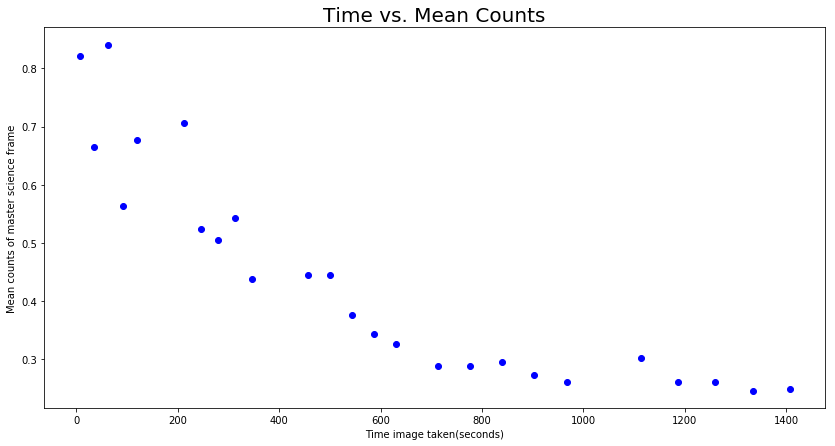

In [36]:
Master_arr = np.empty(len(Mmeans))
counter = 0
for i in Mmeans:
    Master_arr[i]=Mmeans[i]
plt.figure(figsize=(14,7))
plt.plot(Seconds,Master_arr,'bo')
plt.xlabel('Time image taken(seconds)')
plt.ylabel('Mean counts of master science frame')
plt.title('Time vs. Mean Counts',{'fontsize':'20'})
plt.savefig('Cvt',bbox='tight');

In [37]:
# Creating fits files for the lights
n = 1
for i in range(len(Fits)):
    if i != 0:
        if Exptimes[i] == Exptimes[i-1]:
            n += 1
        else:
            n = 1
    else:
        pass
    hdu = fits.PrimaryHDU(Masters[i])
    hdul = fits.HDUList([hdu])
    #hdul.writeto('{0}_SECOND_SCIENCE_FRAME_{1}.MASTER_SCIENCE.FITS'.format(int(Exptimes[i]),n))

In [38]:
# Define a couple functions for finding uncertainties
def Mult_Unc(Final,Start1,Unc_Start1,Start2,Unc_Start2):
    Safe_Start1 = Start1
    Safe_Start2 = Start2
    Safe_Unc1 = Unc_Start1
    Safe_Unc2 = Unc_Start2
    counter1 = 0
    counter2 = 0
    if(type(Start1)==np.ndarray):
        for i in range(len(Start1)):
            if Start1[i]==0:
                np.delete(Safe_Start1,i-counter1)
                np.delete(Safe_Unc1,i-counter1)
                counter1 += 1
            else:
                pass
    if(type(Start2)==np.ndarray):
        for i in range(len(Start2)):
            if Start2[i]==0:
                np.delete(Safe_Start2,i-counter2)
                np.delete(Safe_Unc2,i-counter2)
                counter2 += 1
            else:
                pass
    Unc = Final*np.sqrt((Unc_Start1/Safe_Start1)**2 + (Unc_Start2/Safe_Start2)**2)
    return Unc

def Add_Unc(Start1,Start2):
    Unc = np.sqrt(Start1**2 + Start2**2)
    return Unc

def Mean_Unc(Uncs):
    Safe_Uncs = Uncs
    counter=0
    if(type(Uncs)==np.ndarray):
        for i in range(len(Uncs)):
            if Uncs[i]==0:
                np.delete(Uncs,i-counter)
                counter+=1
            else:
                pass
    if(type(Uncs)==(int or np.int)):
        if Uncs==0:
            Unc = 0
            return Unc
    Unc = 1/np.sqrt(np.sum(1/(Uncs**2)))
    return Unc

In [63]:
# Find the uncertainty of the pixels and the slopes
Unc_Master = np.empty(len(Masters))
Unc_Log_Master = np.empty(len(Masters))
Stds = np.empty(len(Masters))
for i in Masters:
    Stds[i] = np.std(Masters[i])
    Unc_Master[i] = Stds[i]/Exptimes[i]
    Unc_Log_Master[i] = .43*Unc_Master[i]/np.mean(Masters[i])

In [64]:
# Create a line of best fit with uncertainties

def best_fit_slope_and_intercept(xs,ys,Uxs,Uys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)*np.mean(xs)) - np.mean(xs*xs)))
    
    xs_ys_Unc = Mult_Unc(np.mean(xs)*np.mean(ys),np.mean(xs),Mean_Unc(Uxs),np.mean(ys),Mean_Unc(Uys))
    
    Top_Unc = Add_Unc(xs_ys_Unc,Mean_Unc(Mult_Unc(xs*ys,xs,Uxs,ys,Uys)))
    
    xs_xs_Unc = Mult_Unc(np.mean(xs)*np.mean(xs),np.mean(xs),Mean_Unc(Uxs),np.mean(xs),Mean_Unc(Uxs))
    
    Bot_Unc = Add_Unc(xs_xs_Unc,Mean_Unc(Mult_Unc(xs*xs,xs,Uxs,xs,Uxs)))
    
    m_Unc = Mult_Unc(np.abs(m),((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)),xs_ys_Unc,((np.mean(xs)*np.mean(xs)) - np.mean(xs*xs)),Bot_Unc)
    
    b = np.mean(ys) - m*np.mean(xs)
    
    b_Unc = Add_Unc(Mean_Unc(Uys),Mult_Unc(m*np.mean(xs),m,m_Unc,np.mean(xs),Mean_Unc(Uxs)))
    
    return m, b, m_Unc, b_Unc

m, b, m_Unc, b_Unc = best_fit_slope_and_intercept(Seconds,np.log(Master_arr),0,Unc_Log_Master)
x = np.arange(min(Seconds),max(Seconds))
m,b,m_Unc,b_Unc

C:\Users\hitom\Anaconda3\envs\bash\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


(-0.000858377521014029,
 -0.394926093840425,
 7.960096691298792e-06,
 0.005342447331838907)

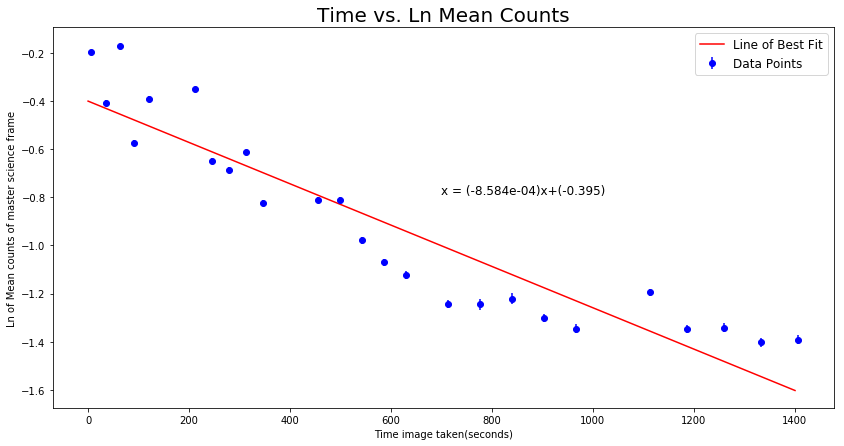

In [73]:
plt.figure(figsize=(14,7))
plt.errorbar(Seconds,np.log(Master_arr),yerr=Unc_Log_Master,fmt='bo',label='Data Points')
plt.plot(m*x + b,'r',label='Line of Best Fit')
plt.xlabel('Time image taken(seconds)')
plt.ylabel('Ln of Mean counts of master science frame')
plt.title('Time vs. Ln Mean Counts',{'fontsize':'20'})
plt.legend(prop={'size':'12'})
plt.text(700,(max(np.log(Master_arr))+min(np.log(Master_arr)))/2,'x = ({0})x+({1})'.format(np.format_float_scientific(m,precision=3),np.round(b,3)),fontsize=12);

In [66]:
# Toss the images containing white streaks to optimize data accuracy
Masker = np.zeros(len(Master_arr))
Masker[40-35] = 1
Masker[41-35] = 1
Masker[51-35] = 1
Masker[52-35] = 1
Masker[57-35] = 1
Masked_Master = ma.array(Master_arr,mask=Masker)
Log_Masked_Master = np.log(Masked_Master)
Masked_Unc = ma.array(Unc_Log_Master,mask=Masker)

In [67]:
# Create new best fit parameters
m2, b2, m2_Unc, b2_Unc = best_fit_slope_and_intercept(Seconds,Log_Masked_Master,0,Masked_Unc)
x = np.arange(min(Seconds),max(Seconds))
m2,b2,m2_Unc,b2_Unc

C:\Users\hitom\Anaconda3\envs\bash\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


(-0.0007867485823965754,
 -0.42441749743737966,
 8.834650375385099e-06,
 0.005929407161259575)

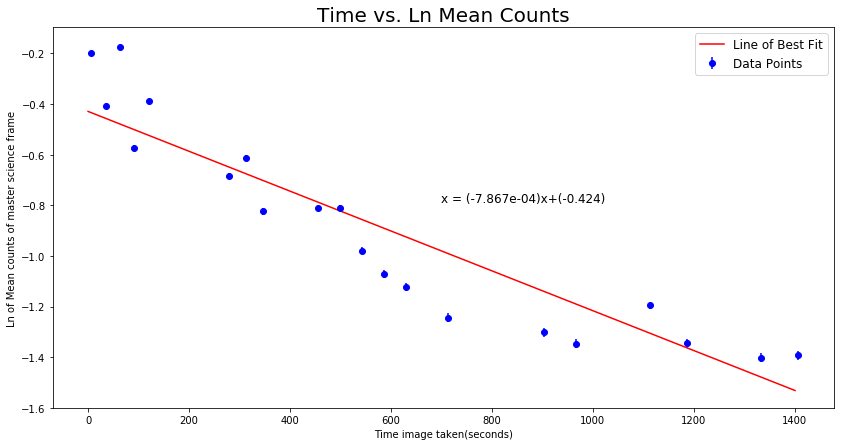

In [72]:
# Graph the masked array
plt.figure(figsize=(14,7))
plt.errorbar(Seconds,Log_Masked_Master,yerr=Masked_Unc,fmt='bo',label='Data Points')
plt.plot(m2*x + b2,'r',label='Line of Best Fit')
plt.xlabel('Time image taken(seconds)')
plt.ylabel('Ln of Mean counts of master science frame')
plt.title('Time vs. Ln Mean Counts',{'fontsize':'20'})
plt.legend(prop={'size':'12'})
plt.text(700,(max(Log_Masked_Master)+min(Log_Masked_Master))/2,'x = ({0})x+({1})'.format(np.format_float_scientific(m2,precision=3),np.round(b2,3)),fontsize=12)
plt.savefig('Masked_Ln_Graph.png',bbox='tight');

In [69]:
Bfits_open[0][0].data

array([[121, 122, 123, ..., 108, 115,  96],
       [122, 135, 120, ..., 113,  98, 118],
       [124, 134, 133, ..., 101, 107, 103],
       ...,
       [128, 118, 126, ..., 109, 107, 102],
       [125, 140, 127, ...,  96, 108,  99],
       [130, 128, 130, ..., 108, 102, 107]], dtype=uint16)

In [70]:
RawBMeans = np.zeros(len(Bfits_open))
RawBMins = np.zeros(len(Bfits_open))
RawBMaxes = np.zeros(len(Bfits_open))
for i in Bfits_open:
    RawBMeans[i] = np.mean(Bfits_open[i][0].data)
    RawBMins[i] = np.min(Bfits_open[i][0].data)
    RawBMaxes[i] = np.max(Bfits_open[i][0].data)
SigB = np.sqrt(RawBMeans)

In [71]:
RawBMeans

array([108.72151224, 108.19991798, 104.21640138, 108.07484557,
       108.98751506, 108.26328848, 110.53115468, 105.81273869,
       107.90990132, 104.06992695, 106.28789184, 107.83108035,
       107.12814559, 106.17311291, 107.21770601, 105.53739075,
       110.60812252, 107.71247725, 110.51241574])

In [48]:
RawBMins

array([77., 77., 73., 75., 76., 76., 73., 69., 73., 71., 78., 75., 72.,
       75., 76., 75., 79., 75., 76.])

In [49]:
RawBMaxes

array([720., 740., 732., 741., 764., 722., 708., 760., 750., 732., 756.,
       750., 698., 719., 698., 704., 762., 732., 782.])

In [50]:
SigB

array([10.42696083, 10.40191896, 10.20864346, 10.39590523, 10.43970857,
       10.40496461, 10.51337979, 10.28653191, 10.38796907, 10.2014669 ,
       10.30960192, 10.38417451, 10.35027273, 10.30403382, 10.3545983 ,
       10.27313928, 10.51703963, 10.37846218, 10.51248856])

In [51]:
RawDMeans = np.zeros(len(Dfits_open))
RawDMins = np.zeros(len(Dfits_open))
RawDMaxes = np.zeros(len(Dfits_open))
for i in Dfits_open:
    RawDMeans[i] = np.mean(Dfits_open[i][0].data)
    RawDMins[i] = np.min(Dfits_open[i][0].data)
    RawDMaxes[i] = np.max(Dfits_open[i][0].data)
SigD = np.sqrt(RawDMeans)

In [52]:
RawDMeans

array([111.09406382, 113.38554146, 112.731411  , 110.1378111 ,
       113.20459311, 114.25718057])

In [53]:
RawDMins

array([79., 77., 77., 75., 75., 77.])

In [54]:
RawDMaxes

array([21742., 21672., 23332., 25963., 30043., 33784.])

In [55]:
SigD

array([10.54011688, 10.64826472, 10.61750493, 10.49465631, 10.63976471,
       10.68911505])

In [56]:
RawMeans = np.zeros(len(Fits_open))
RawMins = np.zeros(len(Fits_open))
RawMaxes = np.zeros(len(Fits_open))
for i in Fits_open:
    RawMeans[i] = np.mean(Fits_open[i][0].data)
    RawMins[i] = np.min(Fits_open[i][0].data)
    RawMaxes[i] = np.max(Fits_open[i][0].data)
Sig = np.sqrt(RawMeans)

In [57]:
RawMeans

array([133.90331924, 130.00866077, 134.40944509, 127.46465206,
       130.31758811, 135.71474817, 130.23730616, 129.67362297,
       130.81577086, 127.7075125 , 134.65406126, 134.6320082 ,
       131.897401  , 130.58598744, 129.90349865, 138.82651032,
       138.81180572, 139.23065231, 137.85844675, 137.1311188 ,
       145.03913623, 142.07815199, 142.16209407, 141.0803819 ,
       141.26176086])

In [58]:
RawMins

array([ 95.,  93., 100.,  90.,  94.,  98.,  93.,  95.,  95.,  91.,  96.,
        98.,  92.,  90.,  94., 100.,  96.,  96.,  95.,  96., 105.,  99.,
       100.,  94.,  94.])

In [59]:
RawMaxes

array([21705., 21734., 21762., 21754., 21845., 23336., 23379., 23464.,
       23364., 23430., 26090., 26054., 26082., 25964., 26093., 30182.,
       30069., 30219., 30118., 30136., 33685., 33902., 33796., 33691.,
       33894.])

In [60]:
Sig

array([11.57166018, 11.40213404, 11.59350875, 11.29002445, 11.41567292,
       11.6496673 , 11.41215607, 11.38743268, 11.43747222, 11.30077486,
       11.60405366, 11.60310339, 11.48465938, 11.42742261, 11.3975216 ,
       11.78246622, 11.7818422 , 11.7996039 , 11.74131367, 11.71029969,
       12.04321951, 11.91965402, 11.92317466, 11.87772629, 11.8853591 ])

In [61]:
Masked_Seconds = ma.array(Seconds,mask=Masker)

In [62]:
cs(Log_Masked_Master,f_exp=(m2*Masked_Seconds + b2))

Power_divergenceResult(statistic=-0.6377682522729677, pvalue=1.0)